# 2020-06-08

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd


from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from preprocessor import *
from stats import *
from plotting import *

/home/esynergetics/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [2]:
    filename = "proteinGroups tryptic.txt"
    data = create_full_data(data_file = filename, treshold = 1)

    data = data.fillna(0) # Input missing values to zero
    data = normalize(data)
    data_values, target_drugs, cell_lines, states, replicates = split_data(data)
    data_vals = data.T # create a data value df
    data = data.T
    data['target_drug'] = target_drugs
    data['cell_line'] = cell_lines
    data['states'] = states
    data['replicates'] = replicates
    data["marker"] = data["cell_line"]+"_"+data["states"]
    target_drug_map = convert_treatmentN_to_treatmentStr(data)
    data["treatment"] = data.replace({"target_drug": target_drug_map}).target_drug


/home/esynergetics/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (726,727) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,12800,12801,12802,12803,target_drug,cell_line,states,replicates,marker,treatment
Reporter intensity corrected 0 A549_D_Rep1,-0.136931,0.172711,-0.180681,-0.180681,-0.032039,-0.180681,-0.066905,1.487712,-0.180681,0.313522,...,-0.180681,-0.180681,0.264803,-0.180681,0,A549,D,Rep1,A549_D,Control
Reporter intensity corrected 1 A549_D_Rep1,-0.205411,0.448214,-0.298873,-0.298873,-0.100126,-0.298873,-0.149248,2.089046,-0.298873,0.792233,...,-0.298873,-0.298873,0.694553,-0.298873,1,A549,D,Rep1,A549_D,8-zaguanine
Reporter intensity corrected 2 A549_D_Rep1,-0.262994,0.784326,-0.365465,-0.365465,-0.093429,-0.365465,-0.219178,2.797368,-0.365465,0.983546,...,-0.365465,-0.365465,0.777553,-0.365465,2,A549,D,Rep1,A549_D,Raltitrexed
Reporter intensity corrected 3 A549_D_Rep1,-0.183195,0.429159,-0.273035,-0.273035,-0.074252,-0.273035,-0.108002,2.271178,-0.273035,0.675689,...,-0.273035,-0.273035,0.426954,-0.273035,3,A549,D,Rep1,A549_D,Topotecan
Reporter intensity corrected 4 A549_D_Rep1,-0.182467,0.362103,-0.261418,-0.261418,-0.069400,-0.261418,-0.102870,1.952033,-0.261418,0.444786,...,-0.261418,-0.261418,0.406647,-0.261418,4,A549,D,Rep1,A549_D,Floxuridine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reporter intensity corrected 5 RKO_S_Rep3,-0.161583,1.069478,-0.496965,-0.496965,-0.496965,-0.496965,-0.342575,5.419675,-0.482095,1.599548,...,-0.496965,-0.492441,0.404043,-0.496965,5,RKO,S,Rep3,RKO_S,Nutlin
Reporter intensity corrected 6 RKO_S_Rep3,-0.174897,1.227712,-0.509468,-0.509468,-0.509468,-0.509468,-0.384359,5.861210,-0.493820,1.499650,...,-0.509468,-0.499157,0.458776,-0.509468,6,RKO,S,Rep3,RKO_S,Dasatinib
Reporter intensity corrected 7 RKO_S_Rep3,-0.079527,1.034080,-0.479453,-0.479453,-0.479453,-0.479453,-0.365184,5.433987,-0.464266,1.436202,...,-0.479453,-0.470588,0.361655,-0.479453,7,RKO,S,Rep3,RKO_S,Gefitinib
Reporter intensity corrected 8 RKO_S_Rep3,-0.242830,0.998672,-0.455334,-0.455334,-0.455334,-0.455334,-0.273340,4.176310,-0.438182,1.473810,...,-0.455334,-0.450703,0.343818,-0.455334,8,RKO,S,Rep3,RKO_S,Vincristine


# Data info

Data format {Reporter intensity corrected}_{treatment<int>}_{cell_line<str>}_{state<str>}_{Rep}{replicate<int>}


## treatment

**0 - TMT marking Control**

**1 - 8-zaguanine**

kills cells having active hypoxanthine-guanine phosphoribosyl (HGPRTase), an enzyme essential for the salvage pathway. 

**2 - Raltitrexed**

Antimetabolite drug used in cancer chemotherapy. It is an inhibitor of thymidylate synthase (Enzyme inhibitor). Raltitrexed is chemically similar to folic acid and is in the class of chemotherapy drugs called folate antimetabolites, which inhibit one or more of three enzymes that use folate and derivatives as substrates: DHFR, GARFT and thymidylate synthase.

**3 - Topotecan**

Chemotherapeutic agent that is topoisomerase inhibitor. It is used to treaat ovarian cancer, lung cancer and other cancer types. (Enzyme inhibtor)

**4 - Floxuridine**

An oncology drug that belongs to the class known as antimetabolites. It is often used to treat colorectal cancer. 

**5 - Nutlin**

Cis-imidazoline analogs which inhibit the interaction between mdm2 and tumor supressor p53. 

**6 - Dasatinib**

Used as a targeted therapy to treat certain cases of chronic myelogenous leukemia and acute lumphoblastic leukemia. 

**7 - Gefitinib**

Drug used for certain breast, lung and other cancers. It is an epidermal growth factor  recepter (EGFR) inhibitor. 

**8 - Vincristine**

Vincristine works partly by binding to the tubulin protein, stopping the tubulin dimers from polymerizing to form microtubules, causing the cell to be unable to separate its chromosomes during the metaphase.

**9 - Bortezomib**

The boron atom in bortezomib binds the catalytic site of the 26S proteasome with high affinity and specificity. In normal cells, the proteasome regulates protein expression and function by degradation of ubiquitylated proteins, and also rids the cell of abnormal or misfolded proteins.


## state

**S** - Surviving

**D** - Dead

## cell_lines

**A549** - Adenocarcinomic human alveolar basal epithelial cells.

**RKO** - Colorectal cancer cells.

**MCF-7** - Breast cancer cells.
    



# PCA plot of the whole data set



In [31]:
np.random.seed(42)
rndperm = np.random.permutation(data.shape[0])
data_vals = data_vals.reset_index().drop("index", axis = 1)
data = data.reset_index().drop("index", axis = 1)


pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_vals)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



Explained variation per principal component: [0.33340555 0.22626289 0.14665547]


In [32]:
print("Variance explained by PC:s " + str(np.sum(pca.explained_variance_ratio_)))

Variance explained by PC:s 0.7063239148082927


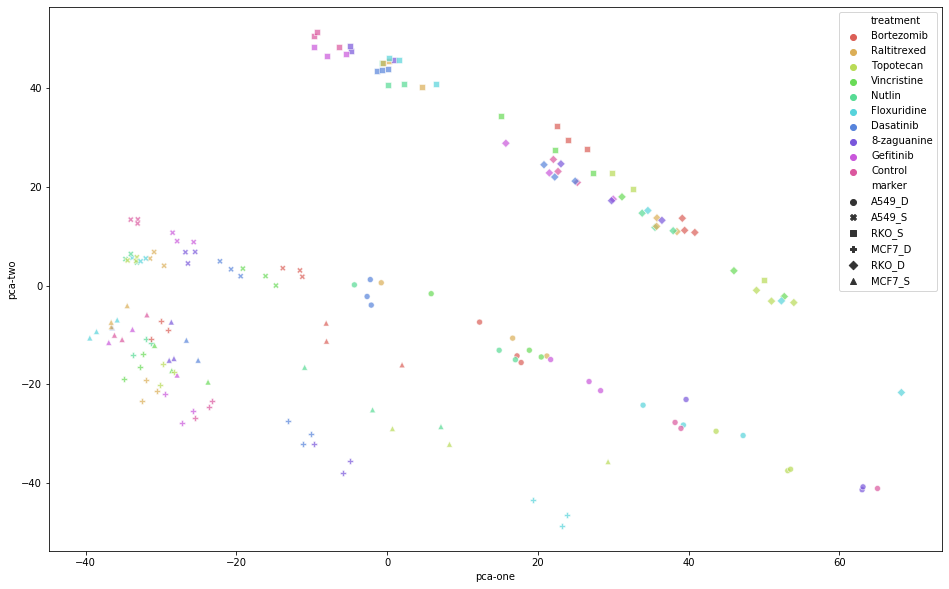

In [5]:

# PCA plot 2D
plt.figure(figsize=(16,10))
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
ax = sns.scatterplot(x="pca-one", y="pca-two", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])

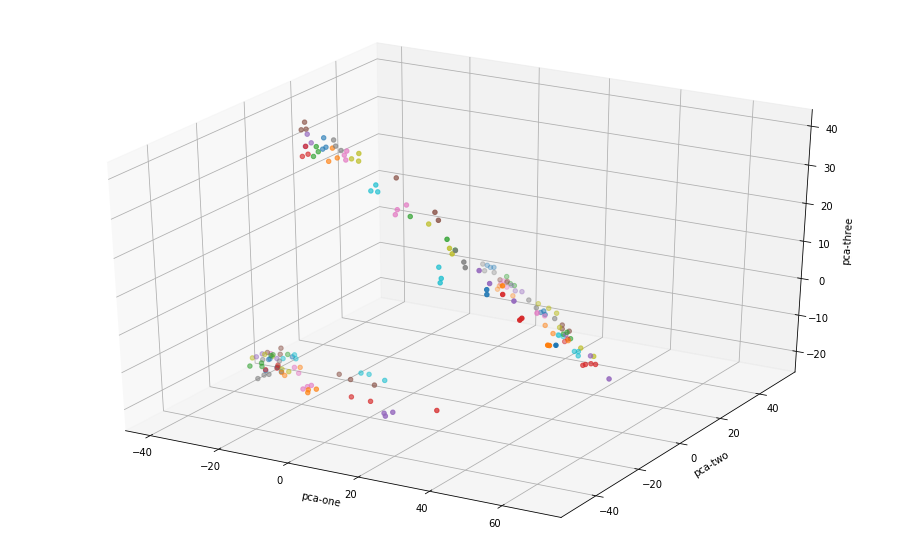

In [7]:
# PCA plot 3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=data.loc[rndperm,:]["pca-one"], 
    ys=data.loc[rndperm,:]["pca-two"], 
    zs=data.loc[rndperm,:]["pca-three"], 
    c=data.loc[rndperm,:]["target_drug"], 
    cmap='tab10',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


In the PCA exploration we can see that all cell lines have clear seperation.

RKO - has clear S and D seperation.
MCF7 - S and D seperation is not very clear.
A549 - has clear S and D seperation.

# t-SNE


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.001s...
[t-SNE] Computed neighbors for 180 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 20.151201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.011547
[t-SNE] KL divergence after 300 iterations: 0.165429
t-SNE done! Time elapsed: 0.3146224021911621 seconds


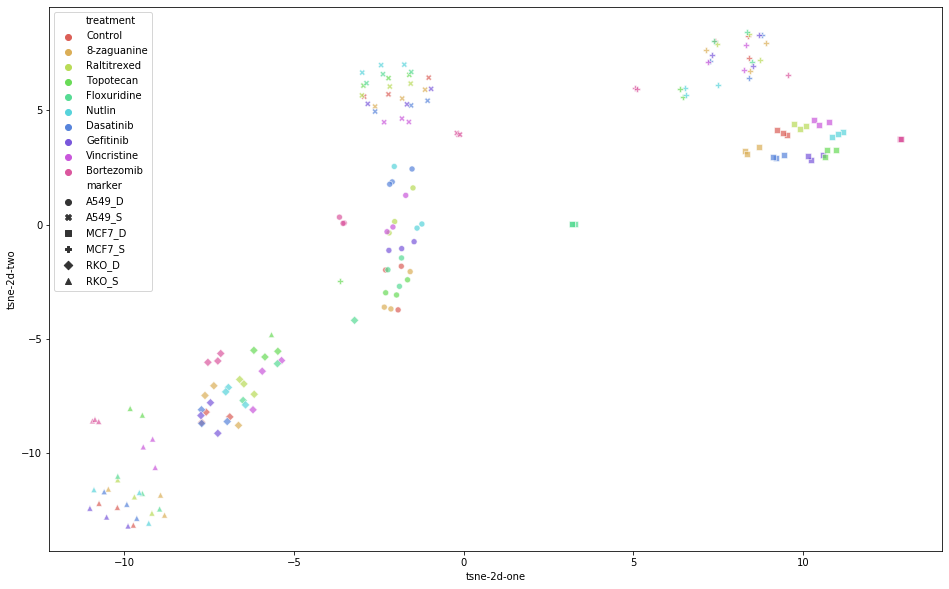

In [8]:

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_vals)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

# t-SNE plot 2D
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    style="marker",
    hue="treatment",
    palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
    data=data,
    legend="full",
    alpha=0.7
)

t-SNE results:

Clear cell lines seperation and state.

**A549_S**

Seperation of treatment, although not very clear.

**A549_D**

No clear seperation of treatments.

**MCF7_S**

No clear seperation of treatment.

**MCF7_D**

Very clear seperation of treatments.

**RKO_S**

Certain seperation of treatments.

**RKO_D**

Certain seperation of treatments.


# t-SNE on PCA components. 

In [33]:
np.random.seed(42)
rndperm = np.random.permutation(data.shape[0])
data_vals = data_vals.reset_index().drop("index", axis = 1)
data = data.reset_index().drop("index", axis = 1)


pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_vals)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.33340555 0.22626289 0.14665547 0.06954847 0.03658033 0.02520553
 0.01581339 0.01487994 0.00956487 0.00895578 0.00769438 0.00729613
 0.00703898 0.00613293 0.0055998  0.00497699 0.00461122 0.004578
 0.00416893 0.00405166 0.00386298 0.00360112 0.00347438 0.00312317
 0.00307495 0.00301285 0.00272854 0.0023406  0.00225673 0.00199594
 0.00185462 0.00162908 0.00150982 0.001302   0.00121675 0.00111772
 0.00102824 0.0009743  0.00085826 0.00080921 0.00078489 0.00071059
 0.00069013 0.00065472 0.00060611 0.00058211 0.00052968 0.00049907
 0.00048278 0.00042932]


In [34]:
print("Variance explained by PC:s " + str(np.sum(pca.explained_variance_ratio_)))

Variance explained by PC:s 0.9907618992159547


In [35]:
pca_result = pd.DataFrame(pca_result)

In [36]:
pca_result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,65.044762,-41.057889,12.005939,15.195568,-3.646781,-2.884358,16.533895,-8.671151,0.185401,2.122885,...,-2.706501,-1.048920,-0.144357,5.526689,-1.307428,5.093125,3.856109,-0.829819,-0.761275,-2.113319
1,39.646855,-23.055995,17.195906,7.717279,-2.395585,2.435767,-0.439347,3.533649,1.650149,1.446724,...,0.264344,-0.607280,-0.112185,-1.727665,-0.558773,-1.339591,-0.100166,-1.827908,0.790095,-0.681895
2,-0.792690,0.559181,21.482935,-4.528986,-0.250327,7.454733,-9.339010,9.725221,4.253337,0.257276,...,-0.119808,-0.084885,-0.410627,-1.509947,-3.376097,1.955099,-1.233705,0.792598,-1.536981,0.946062
3,43.629596,-29.484369,17.643246,10.374270,-3.743954,3.842773,2.917496,2.923701,0.241870,3.338953,...,-1.001987,-0.209613,0.570284,-1.752708,-0.158105,-0.613906,0.490429,-1.606350,1.597907,0.908427
4,47.212589,-30.347021,16.831398,11.535006,-3.421311,2.951870,4.559946,-1.205332,0.800307,3.216876,...,0.231413,2.315190,-0.208276,-0.832252,-0.514577,-0.638259,-0.407526,1.420156,-0.525677,0.181359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.670077,45.099855,-9.551244,6.522151,-6.330913,1.546242,10.789731,1.205098,13.005318,11.483400,...,2.031452,1.694579,-2.432724,-0.055723,-1.481981,-0.067986,1.647706,-0.879329,0.818156,0.406410
176,0.136821,43.886669,-10.365173,6.366550,-5.124973,6.770357,6.357934,1.994984,11.183002,11.927276,...,-1.246780,-0.652016,1.720770,0.400980,-1.516336,-1.868722,-0.843224,-0.965541,0.475250,-0.590753
177,-5.433967,46.818503,-8.126390,7.847130,-7.387506,2.920284,11.781582,4.871668,8.114819,13.013900,...,0.432755,-0.337624,-0.419004,-1.753282,-0.931821,-0.819680,-1.445480,-1.060036,-0.578525,0.460961
178,15.152795,34.391111,-9.490251,3.232692,-1.446583,6.560648,5.978160,-3.532971,14.237420,3.172787,...,-1.782951,0.020436,1.122195,-0.978967,-0.932900,1.876498,-1.673193,0.107587,1.573630,-1.509549


180 samples and features reduced from 12800 reported intensities corrected to 50 PC components.

In [37]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.000s...
[t-SNE] Computed neighbors for 180 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 30.578518
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.662086
[t-SNE] KL divergence after 300 iterations: 0.167961
t-SNE done! Time elapsed: 0.27646923065185547 seconds


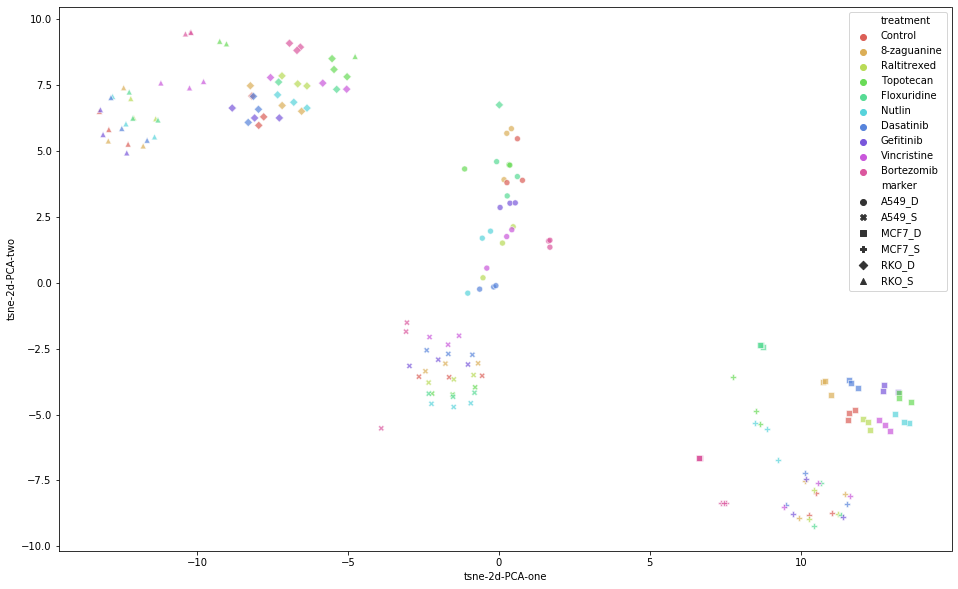

In [39]:
data['tsne-2d-PCA-one'] = tsne_results[:,0]
data['tsne-2d-PCA-two'] = tsne_results[:,1]

# t-SNE plot 2D
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-PCA-one", y="tsne-2d-PCA-two",
    style="marker",
    hue="treatment",
    palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
    data=data,
    legend="full",
    alpha=0.7
)

t-SNE with PCA results:

Clear cell lines seperation and state.

**A549_S**

Seperation of treatment, although not very clear.

**A549_D**

No clear seperation of treatments.

**MCF7_S**

No clear seperation of treatment.

**MCF7_D**

Very clear seperation of treatments.

**RKO_S**

Certain seperation of treatments.

**RKO_D**

Certain seperation of treatments.

NOTE: Results are same as t-SNE without PCA.